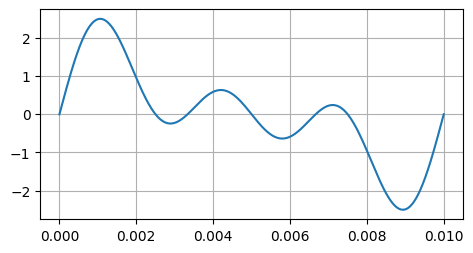

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

f1 = 100
f2 = 200
f3 = 300
fs = 4000

t1 = np.arange(0, 0.01, 1/fs)

sinc_arr1 = np.sin(2*np.pi*f1*t1)
sinc_arr2 = np.sin(2*np.pi*f2*t1)
sinc_arr3 = np.sin(2*np.pi*f3*t1)

# Multitone frequency
sin_func = sinc_arr1 + sinc_arr2 + sinc_arr3

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t1, sin_func)
ax1.grid(True)

## Power Spectrum

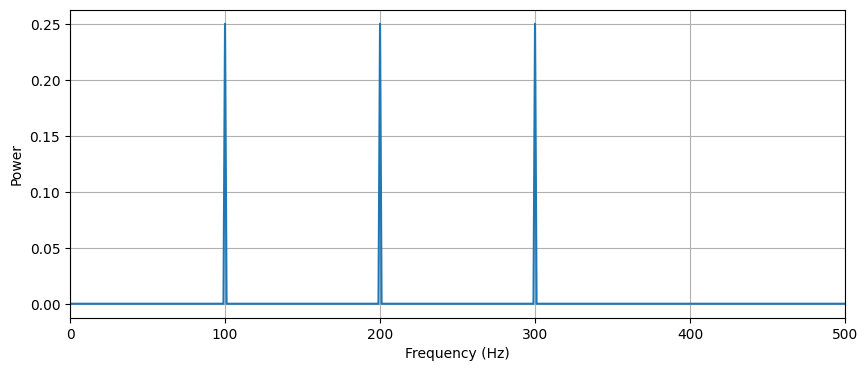

In [85]:
import numpy as np
import matplotlib.pyplot as plt

fs = 4000
f1, f2, f3 = 100, 200, 300

t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

N = len(x)

# FFT
X = np.fft.fft(x)

# Positive frequencies only
freq = np.fft.fftfreq(N, d=1/fs)
pos = freq >= 0

# Power spectrum
power = (np.abs(X[pos]) / N)**2

plt.figure(figsize=(10,4))
plt.plot(freq[pos], power)
plt.xlim(0, 500)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

## Modulation 

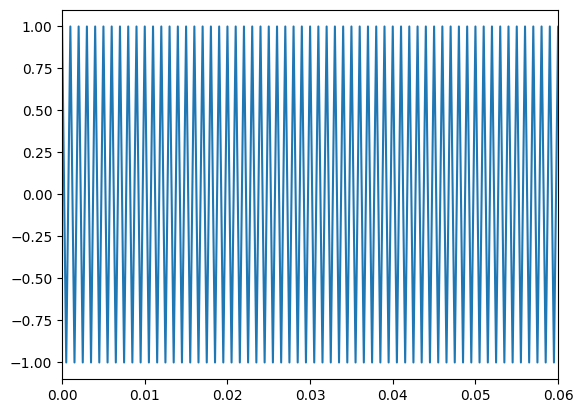

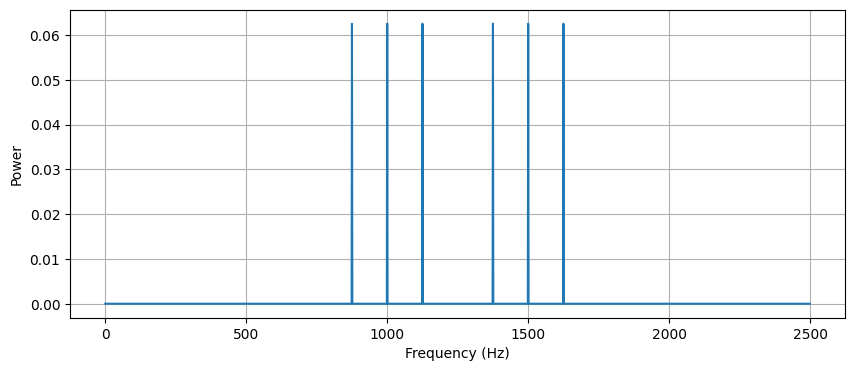

In [ ]:
from scipy.signal import butter, filtfilt

order = 6
cutoff = 500
fc = 500

wn = cutoff / (fs/2)
b, a = butter(order, wn, btype="low")

carrier = np.cos(2*np.pi*fc*t)

plt.plot(t, carrier)
plt.xlim([0, 0.06])
modulated = carrier * x

# modulated = filtfilt(b, a, modulated)

N = len(modulated)
modulated_fft = np.fft.fft(modulated)

# Positive frequencies only
freq = np.fft.fftfreq(N, d=1/fc)
pos = freq >= 0

# Power spectrum
power = (np.abs(modulated_fft[pos]) / N)**2

plt.figure(figsize=(10,4))
plt.plot(freq[pos], power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

(array([1.53324552e-09, 6.13298208e-09, 9.19947312e-09, 6.13298208e-09,
        1.53324552e-09]),
 array([ 1.        , -3.9671626 ,  5.90202586, -3.90255878,  0.96769554]))